In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

In [2]:
chars = ["array([[2]], dtype=uint8", "array", "\n", "[", "]", "(", ")"]

def string_to_ndarray(sd):
    for char in chars:
        sd = sd.replace(char, "")

    sd = sd.replace("   ", " ")
    sd = sd[:-2]

    sd_lst = sd.split(" ")
    sd_lst = [float(i) for i in sd_lst]

    sd_arr = np.asarray(sd_lst)
    sd_arr = np.split(sd_arr, len(sd_arr)/3)
    
    return np.asarray(sd_arr)

In [84]:
df_data = pd.read_csv("../Data/preprocessed_alcohol_balance.csv")
# display(df_data)
print(df_data.shape)

(1232, 25)


In [4]:
print(list(df_data))

['TestID', 'Conditie', 'SubjectID', 'SegmentNr', 'WalkingDirection', 'SegmentData', 'Alcohol', 'Height', 'Weight', 'Age', 'BMI', 'Balance_MLrange', 'Balance_MLstdev', 'Balance_MLmeanVelocity', 'Balance_APrange', 'Balance_APstdev', 'Balance_APmeanVelocity', 'Balance_MeanVelocity', 'GaitVelocity', 'MovementVelocity', 'mad_SegmentData', 'mean_StepLength', 'Velocity', 'Alcohol_Class', 'std_SegmentData']


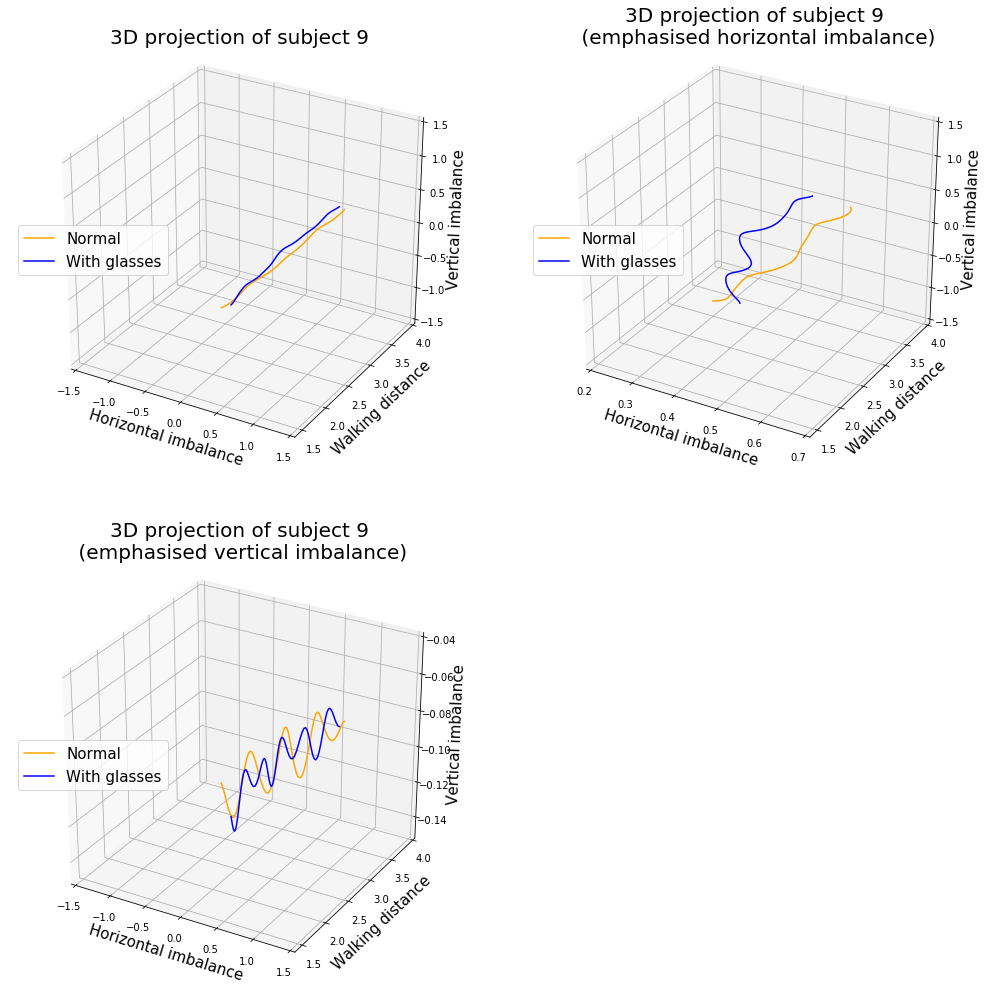

In [168]:
i = 7

fig = plt.figure(figsize=(15, 15))
ax1 = fig.add_subplot(221, projection='3d')
ax2 = fig.add_subplot(222, projection='3d')
ax3 = fig.add_subplot(223, projection='3d')


n_data = df_data["SegmentData"][i]
n_data_arr = string_to_ndarray(n_data)
n_x = n_data_arr[:,0]
n_y = n_data_arr[:,1]
n_z = n_data_arr[:,2]

b_data = df_data["SegmentData"][i + 616]
b_data_arr = string_to_ndarray(b_data)
b_x = b_data_arr[:,0]
b_y = b_data_arr[:,1]
b_z = b_data_arr[:,2]

title_fontsize = 20
axes_fontsize = 15

# normal plot
title = '3D projection of subject ' + str(df_data["SubjectID"][i]) + '\n'
ax1.set_title(title, fontsize=title_fontsize)
ax1.plot(n_x, n_z, n_y, color='orange', label='Normal')
ax1.plot(b_x, b_z, b_y, color='blue', label='With glasses')
ax1.set_xlim3d([-1.5, 1.5])
ax1.set_ylim3d([1.4, 4])
ax1.set_zlim3d([-1.5, 1.5])
ax1.set_xlabel('Horizontal imbalance', fontsize=axes_fontsize)
ax1.set_ylabel('Walking distance', fontsize=axes_fontsize)
ax1.set_zlabel('Vertical imbalance', fontsize=axes_fontsize)
ax1.legend(loc=6, fontsize=axes_fontsize)

# plot emph x
title = '3D projection of subject ' + str(df_data["SubjectID"][i]) + '\n (emphasised horizontal imbalance)\n'
ax2.set_title(title, fontsize=title_fontsize)
ax2.plot(n_x, n_z, n_y, color='orange', label='Normal')
ax2.plot(b_x, b_z, b_y, color='blue', label='With glasses')
ax2.set_xlim3d([0.2, 0.7])
ax2.set_ylim3d([1.4, 4])
ax2.set_zlim3d([-1.5, 1.5])
ax2.set_xlabel('Horizontal imbalance', fontsize=axes_fontsize)
ax2.set_ylabel('Walking distance', fontsize=axes_fontsize)
ax2.set_zlabel('Vertical imbalance', fontsize=axes_fontsize)
ax2.legend(loc=6, fontsize=axes_fontsize)

# plot emph y
title = '3D projection of subject ' + str(df_data["SubjectID"][i]) + '\n (emphasised vertical imbalance)\n'
ax3.set_title(title, fontsize=title_fontsize)
ax3.plot(n_x, n_z, n_y, color='orange', label='Normal')
ax3.plot(b_x, b_z, b_y, color='blue', label='With glasses')
ax3.set_xlim3d([-1.5, 1.5])
ax3.set_ylim3d([1.4, 4])
ax3.set_zlim3d([-.15, -.04])
ax3.set_xlabel('Horizontal imbalance', fontsize=axes_fontsize)
ax3.set_ylabel('Walking distance', fontsize=axes_fontsize)
ax3.set_zlabel('Vertical imbalance', fontsize=axes_fontsize)
ax3.legend(loc=6, fontsize=axes_fontsize)

fig.tight_layout(pad=5)
fig.savefig('3Dprojection.png')